In [64]:
import pandas as pd
from numpy import isnan
import datetime
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import os
 
# Credenciales aqui:
os.environ['KAGGLE_USERNAME'] = "juanmg0511" #BORRAR CUANDO SE TERMINE DE USAR!!!
os.environ['KAGGLE_KEY'] = "*" #BORRAR CUANDO SE TERMINE DE USAR!!!

In [65]:
sns.set(rc = {'figure.figsize':(20,5)})

# Aca podes subir al colab o usar tus credenciales arriba para cargar la data

In [66]:
# OPCION CARGAR LA DATA DESDE KAGGLE PONIENDO CREDENCIALES (no olvidarse de quitarlas antes de irse)

!kaggle competitions leaderboard --download nlp-getting-started
!unzip -o nlp-getting-started.zip -d leaderboard
leaderboard = pd.read_csv("leaderboard/nlp-getting-started-publicleaderboard.csv")

  0%|                                               | 0.00/58.6k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 58.6k/58.6k [00:00<00:00, 608kB/s]
Archive:  nlp-getting-started.zip
  inflating: leaderboard/nlp-getting-started-publicleaderboard.csv  


In [67]:
leaderboard['SubmissionDate'] = leaderboard['SubmissionDate'].astype('datetime64')
leaderboard['SubmissionDate'] = leaderboard.SubmissionDate.apply(lambda x: x - timedelta(hours=2.9)) #corrige la hora corrida de kaggle

# AGREGA TU NOMBRE DE GRUPO ACA (si queres)

In [78]:
# En nombre_en_kaggle se agregan los grupos que no pudieron ser encontrados en piazza
# y que a ojo se encontraron en kaggle

nombre_en_kaggle = [
    'DatUs',
    'NaN',               
    'COVIgData-19',
    'COVIDATOS' ,
    'fiuba_barros_gomez', 
    'Data Science Monsters',
    'Tomas Sabao',
    'Grupo 1 - King Data',
    'Lucio López Lecube',
    'Maximiliano Petrucci',
    'Niko Farfan',
    'Ariel Vergara',
    'Grupo python fiuba',
    'El tio del marido de Pampita',
    'Barbijo de Uranio',
    'Grupo 33 - DataTravellers',
    'El Cuarteto Imperial',
    'Grupo Rosa',
    'Aprendices de Oogway',
    'Daniela Carrero',
    'How I Met Your Data',
    'Datavid-20',
    'Oh La La... Data',
    'Grupo 1 - King Data',
    'EconoDatos',
    'Rest Driven Development',
    'CoronaDatos',
    'Reseed',
    'GrupoConBarbijo',
    'Grupo 13',
    'Corona2',
    'Datavid-19',
    'ChocoTeam',
    'Pyrañas',
    'Data Science Monsters',
    'Data Hunters',
    'Martin Monzo',
    'Grupo 42',
    'Undefined',
    'Les Chiques Super Poderoses',
    'Equipo Cloud',
    'Tomas Sabao',
    'NaN',
    'El Cuarteto del Code',
    'Los Ultimos',
    'alphazero',
    'DataDevs',
    'undefined reference',
    'Team_Undav',
    'Julian Garate',
    'undefined reference',
    'Matias Loiseau',
    'Martín Monzó',
    'Rest Driven Development',
    'CoronaDatos',
    'Reseed',
    'Grupo Orga Datos'
]

# Creando el leaderboard

In [79]:
cross = leaderboard[leaderboard['TeamName'].isin(nombre_en_kaggle)]
aux = cross\
    .groupby('TeamName')\
    .apply(lambda x: x.nlargest(2, 'SubmissionDate'))\
    .reset_index(drop=True)
aux['last_plus'] = -aux.groupby('TeamName')['Score'].diff().shift(-1)
datos_leaderboard = aux.groupby('TeamName')['SubmissionDate'].max().to_frame().merge(aux, on = 'SubmissionDate')
submits_record = cross.groupby('TeamName')['SubmissionDate'].count().rename('cantidad_submits_record')
datos_leaderboard = submits_record.to_frame().merge(datos_leaderboard, on = 'TeamName')
datos_leaderboard = datos_leaderboard.sort_values('Score', ascending = False).reset_index()
mean = datos_leaderboard['Score'].mean()
datos_leaderboard['relative'] = (datos_leaderboard['Score'] - mean) * 100
datos_leaderboard.rename(columns={'SubmissionDate':'last_record_submission_date'}, inplace=True)
datos_leaderboard['rank'] = datos_leaderboard.index + 1
datos_leaderboard.set_index('rank', inplace = True)
datos_leaderboard = datos_leaderboard[['TeamName','Score','last_plus','relative','last_record_submission_date','cantidad_submits_record']]

# Leaderboard Orga de Datos

In [80]:
datos_leaderboard

,TeamName,Score,last_plus,relative,last_record_submission_date,cantidad_submits_record
rank,,,,,,
1,Grupo python fiuba,0.85136,0.00031,3.671892,2020-08-08 00:19:55,14
2,Datavid-20,0.84400,0.00613,2.935892,2020-08-03 17:55:17,8
3,El Cuarteto Imperial,0.84339,0.00276,2.874892,2020-08-02 23:33:42,19
4,COVIgData-19,0.84308,0.00429,2.843892,2020-08-06 23:44:54,9
5,undefined reference,0.83849,0.00123,2.384892,2020-08-08 23:15:48,13
6,COVIDATOS,0.83849,0.00429,2.384892,2020-08-04 20:55:40,10
7,El tio del marido de Pampita,0.83757,0.00092,2.292892,2020-08-08 18:35:25,16
8,Corona2,0.83726,0.00122,2.261892,2020-08-05 22:49:52,9
9,How I Met Your Data,0.83665,0.00766,2.200892,2020-08-03 14:40:08,4


# En que anduvieron los demas teams?

In [71]:
datos_leaderboard.sort_values('last_record_submission_date', ascending = False)[['TeamName','last_record_submission_date','last_plus','Score']]

,TeamName,last_record_submission_date,last_plus,Score
rank,,,,
18,Grupo 13,2020-08-09 14:55:25,0.00031,0.82378
10,Grupo 33 - DataTravellers,2020-08-09 12:59:08,0.00368,0.83634
21,CoronaDatos,2020-08-09 10:45:57,0.00184,0.81612
5,undefined reference,2020-08-08 23:15:48,0.00123,0.83849
11,Julian Garate,2020-08-08 22:50:13,0.01900,0.83512
7,El tio del marido de Pampita,2020-08-08 18:35:25,0.00092,0.83757
15,Grupo Orga Datos,2020-08-08 17:44:37,0.00307,0.83236
20,Datavid-19,2020-08-08 16:32:35,0.01839,0.82071
14,Team_Undav,2020-08-08 00:53:48,0.01992,0.83389


# Submits record por dia

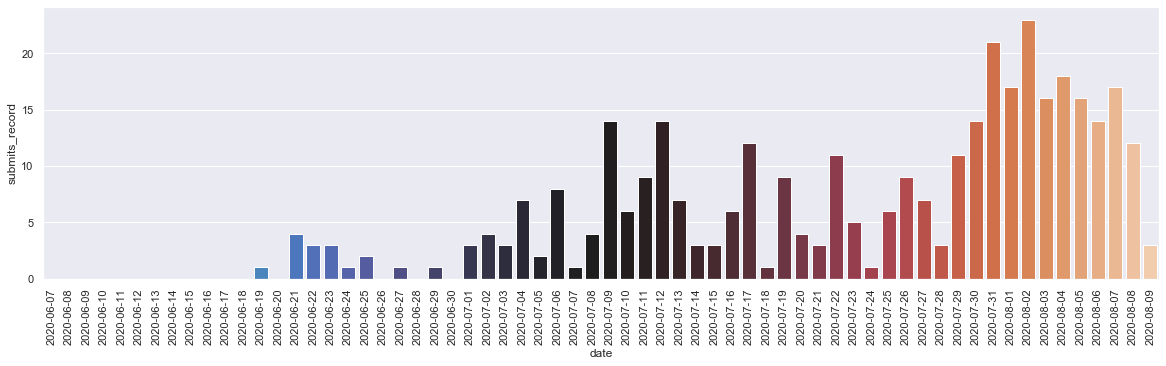

In [72]:
cross_with_date = cross.copy()
cross_with_date['date'] = cross_with_date['SubmissionDate'].apply(lambda x: datetime.date(x.year, x.month, x.day))
submits_per_day = cross_with_date.groupby('date').TeamName.count().to_frame().reset_index()\
                                    .rename(columns = {'TeamName':'submits_record'})

base = min(submits_per_day.date)
days = (max(submits_per_day.date) - min(submits_per_day.date)).days
date_list = [base + datetime.timedelta(days=x) for x in range(1,days+1)]

submits = []
for day in date_list:
    if len(submits_per_day[submits_per_day.date == day]):
        submits.append(submits_per_day[submits_per_day.date == day].submits_record.values[0])
    else:
        submits.append(0)

submits_per_day = pd.DataFrame(
    {
        'date':date_list,
        'submits_record': submits
    }
)

v = sns.barplot(x = 'date', y = 'submits_record', data = submits_per_day, palette = 'icefire')
for item in v.get_xticklabels():
        item.set_rotation(90)

# Podes ver el progreso del team que quieras

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


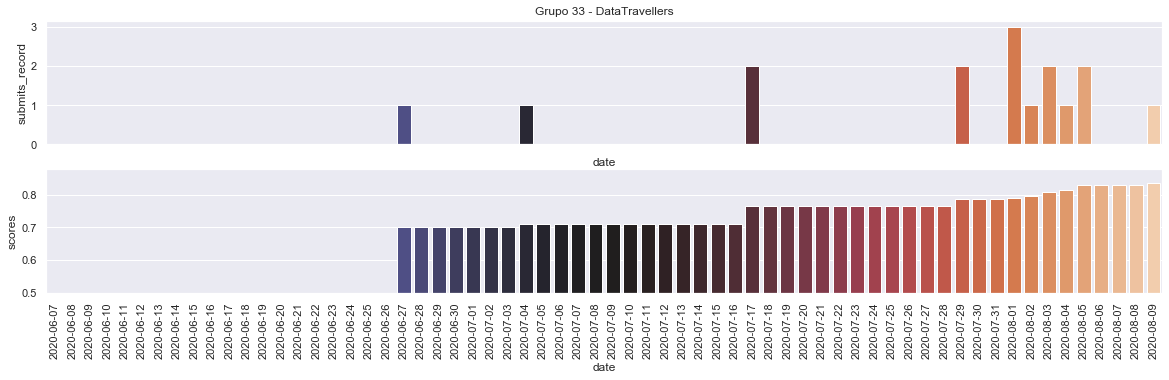

In [74]:
#teamName = datos_leaderboard.iloc[0].TeamName
teamName = 'Grupo 33 - DataTravellers' #pone tu grupo

team = cross[cross.TeamName == teamName]
team['date'] = team['SubmissionDate'].apply(lambda x: datetime.date(x.year, x.month, x.day))
submits_per_day = team.groupby('date').TeamName.count().to_frame().reset_index()\
                                    .rename(columns = {'TeamName':'submits_record'})
scores = []
submits = []
score = 0
for day in date_list:
    if len(team[team.date == day]):
        submits.append(submits_per_day[submits_per_day.date == day].submits_record.values[0])
        score = team[team.date == day]['Score'].values[0]
        scores.append(score)
    else:
        submits.append(0)
        scores.append(score)

submits_per_day = pd.DataFrame(
    {
        'date':date_list,
        'submits_record': submits,
        'scores':scores
    }
)
fig, axs = plt.subplots(nrows=2)

v = sns.barplot(x = 'date', y = 'submits_record', data = submits_per_day, palette = 'icefire', ax=axs[0])
v.set_title(label=teamName)
v.set_xticklabels(labels=[])
for item in v.get_xticklabels():
        item.set_rotation(90)

v = sns.barplot(x = 'date', y = 'scores', data = submits_per_day, palette = 'icefire', ax=axs[1])
v.set_ylim(0.5,None)
for item in v.get_xticklabels():
        item.set_rotation(90)

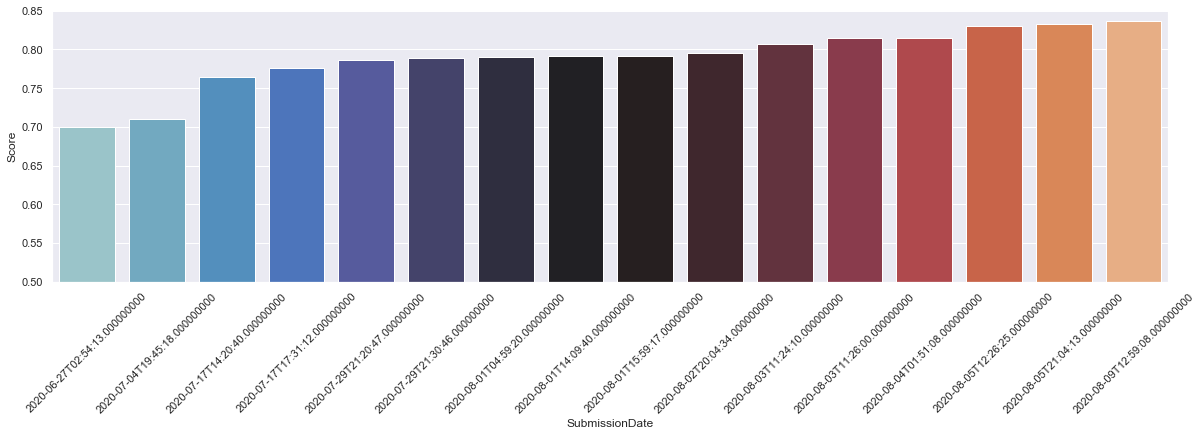

In [75]:
teamName = 'Grupo 33 - DataTravellers' #pone tu grupo

v = sns.barplot(x = 'SubmissionDate', y = 'Score', data = leaderboard[ leaderboard['TeamName'] == teamName ], palette = 'icefire')
v.set(ylim=(0.5, datos_leaderboard['Score'].max()))
for item in v.get_xticklabels():
        item.set_rotation(45)